In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')


In [3]:
data.sample(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
276,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
395,LP002272,Male,Yes,2,Graduate,No,3276,484.0,135.0,360.0,NaN,Semiurban,Y
289,LP001935,Male,No,0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural,Y


In [4]:
data.shape


(614, 13)

In [5]:
data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.drop('Loan_ID', axis=1, inplace= True)


In [8]:
data.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
pd.set_option('display.max_rows', None)


In [10]:
data.isin(["3+"]).sum()


Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.replace(to_replace="3+", value='3', inplace= True)


In [12]:
cat_features= data.select_dtypes(include=[np.object])
cat_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [13]:
for col in cat_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())
    print('=='*16)



Gender column: 
Male      489
Female    112
Name: Gender, dtype: int64

Married column: 
Yes    398
No     213
Name: Married, dtype: int64

Dependents column: 
0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

Education column: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed column: 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area column: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status column: 
Y    422
N    192
Name: Loan_Status, dtype: int64


In [14]:
data['Gender'].fillna(value='Male', inplace=True)


In [15]:
data['Married'].fillna(value='Yes', inplace=True)


In [16]:
data['Dependents'].fillna(value='0', inplace=True)


In [17]:
data['Self_Employed'].fillna(value='No', inplace=True)


In [18]:

num_features= data.select_dtypes(include=[np.number])
num_features.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [19]:
data['LoanAmount'].fillna(value=data['LoanAmount'].median(), inplace= True)


In [20]:
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].median(), inplace= True)


In [21]:
data['Credit_History'].fillna(value=data['Credit_History'].median(), inplace= True)


In [22]:
data.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data['Dependents']=data['Dependents'].astype(str).astype(int)


In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [25]:
data.describe()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])


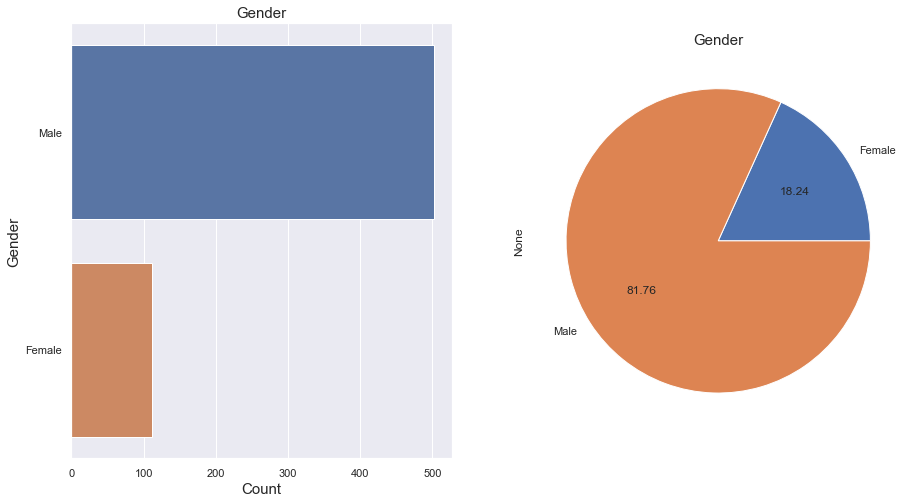

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Gender'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Gender', fontsize=15 )
plt.title('Gender', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Gender', fontsize=15)
plt.show()


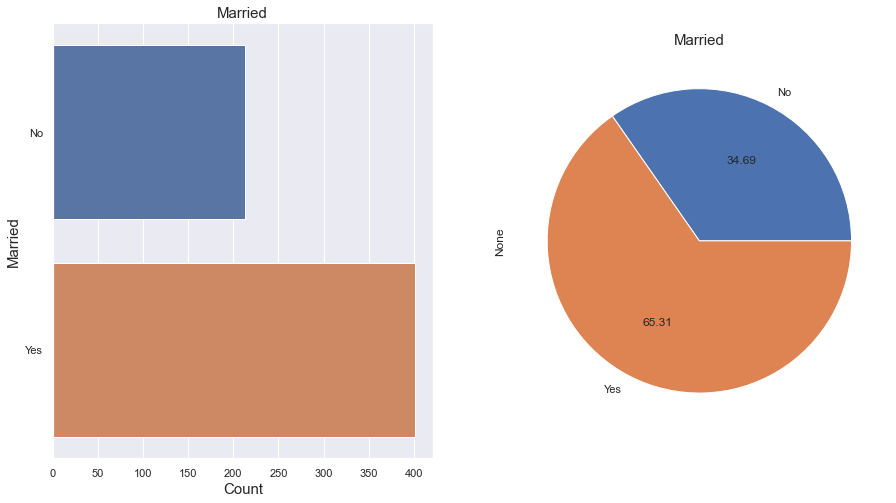

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Married'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Married', fontsize=15 )
plt.title('Married', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Married').size().plot(kind='pie', autopct='%.2f')
plt.title('Married', fontsize=15)
plt.show()


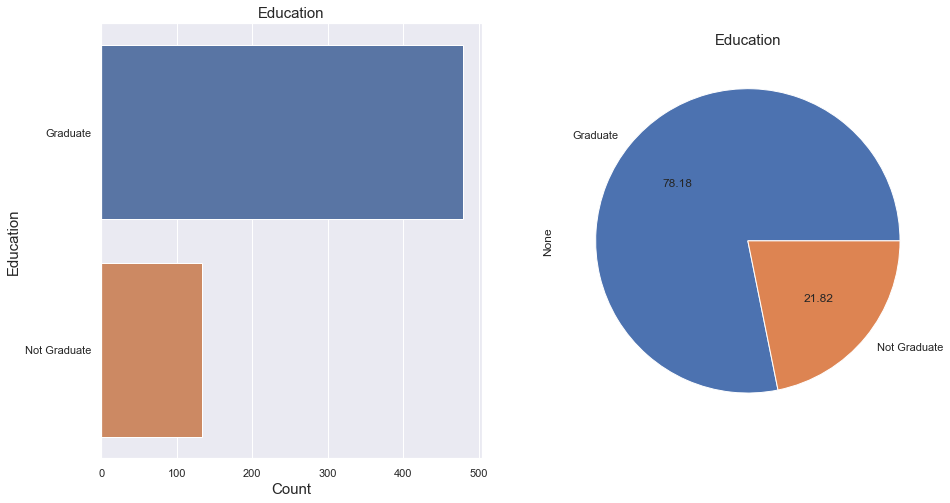

In [29]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Education'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Education', fontsize=15 )
plt.title('Education', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()


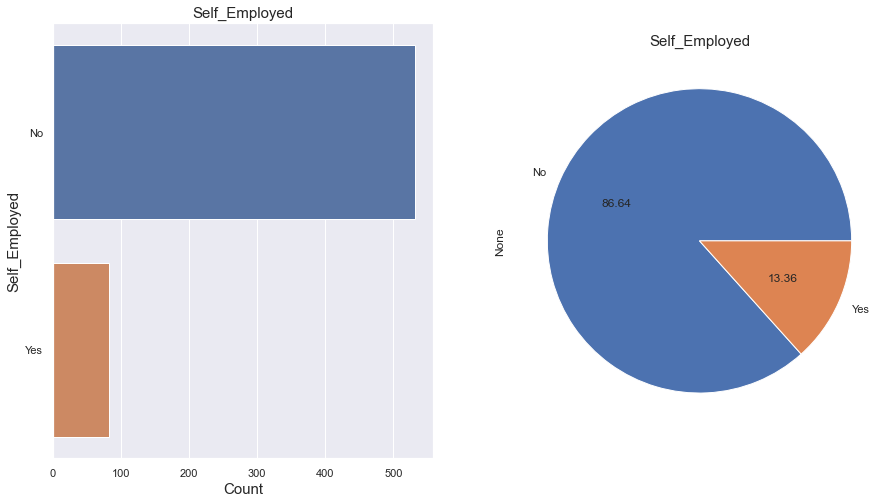

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Self_Employed'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Self_Employed', fontsize=15 )
plt.title('Self_Employed', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Self_Employed').size().plot(kind='pie', autopct='%.2f')
plt.title('Self_Employed', fontsize=15)
plt.show()


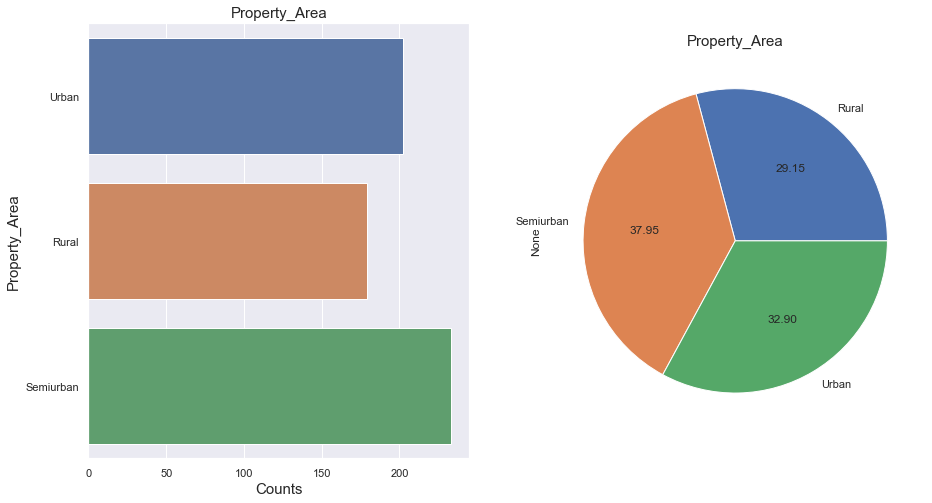

In [31]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Property_Area'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Property_Area', fontsize=15 )
plt.title('Property_Area', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f')
plt.title('Property_Area', fontsize=15)
plt.show()


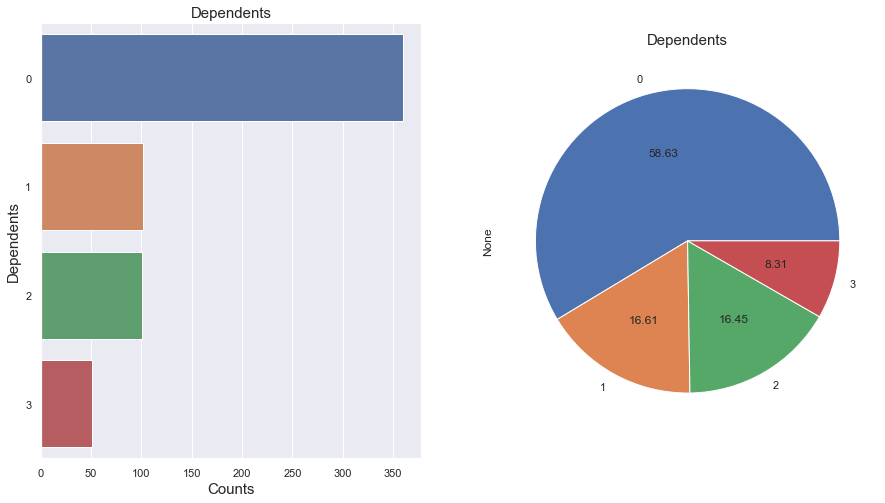

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Dependents'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Dependents', fontsize=15 )
plt.title('Dependents', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')
plt.title('Dependents', fontsize=15)
plt.show()


Text(0.5, 1.0, 'ApplicantIncome')

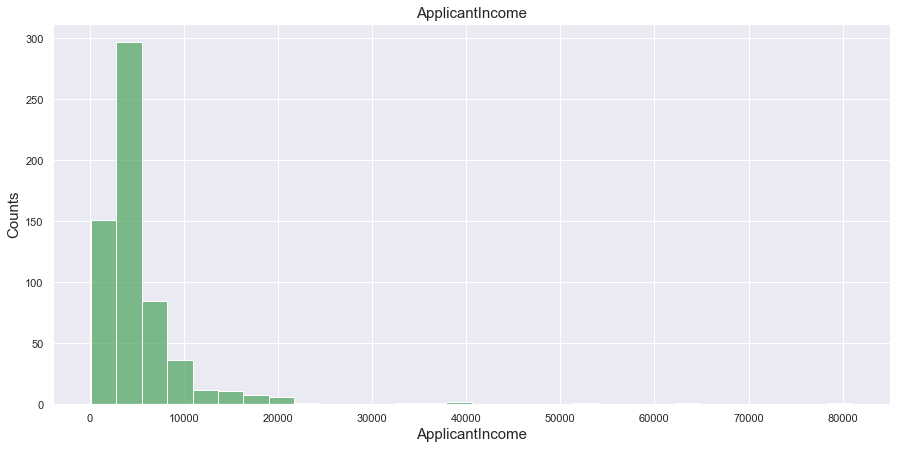

In [33]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['ApplicantIncome'], bins= 30, color='g')
plt.xlabel('ApplicantIncome', fontsize=15 )
plt.ylabel('Counts', fontsize=15 )
plt.title('ApplicantIncome', fontsize=15)

Text(0.5, 1.0, 'CoapplicantIncome')

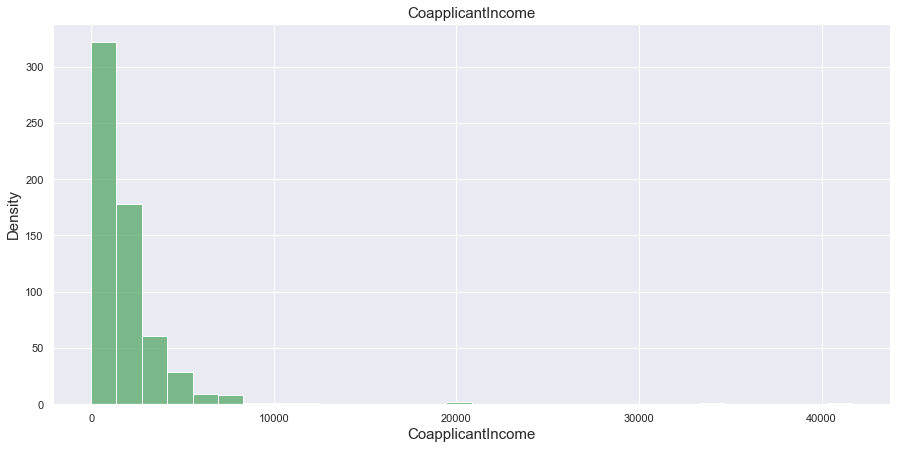

In [34]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['CoapplicantIncome'], bins= 30, color='g')
plt.xlabel('CoapplicantIncome', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('CoapplicantIncome', fontsize=15)

Text(0.5, 1.0, 'LoanAmount')

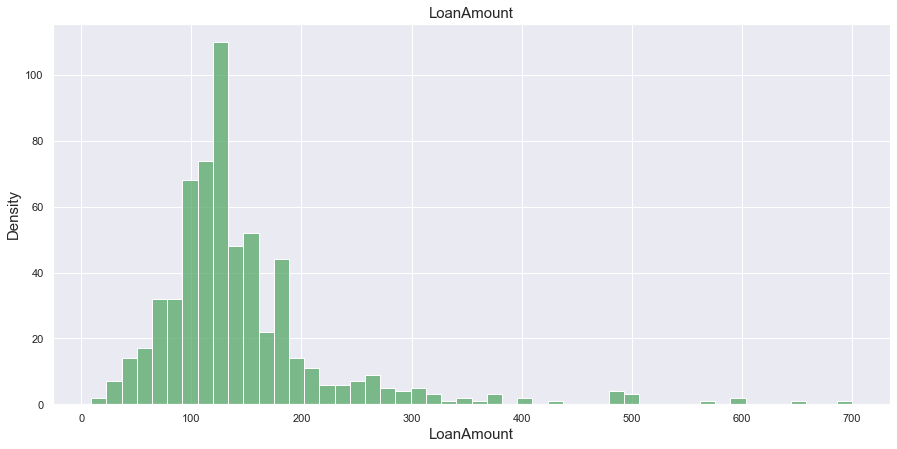

In [35]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['LoanAmount'], bins= 50, color='g')
plt.xlabel('LoanAmount', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('LoanAmount', fontsize=15)


Text(0.5, 1.0, 'Loan_Amount_Term')

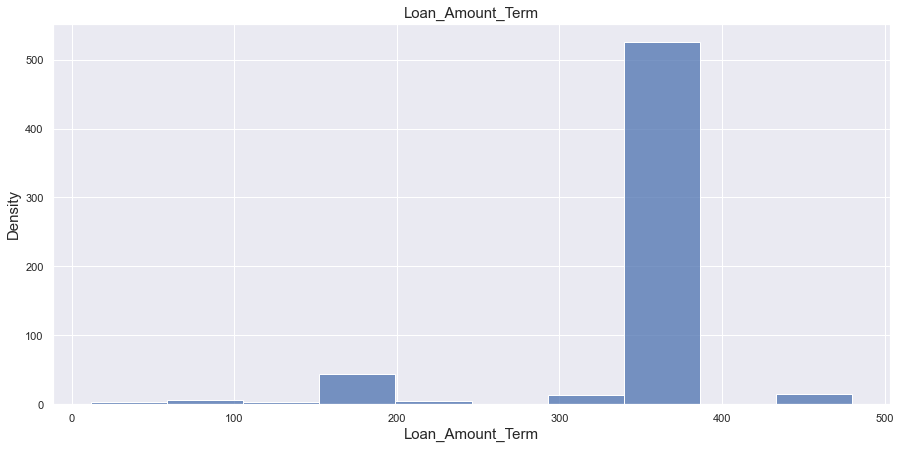

In [36]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['Loan_Amount_Term'], bins= 10)
plt.xlabel('Loan_Amount_Term', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Loan_Amount_Term', fontsize=15)


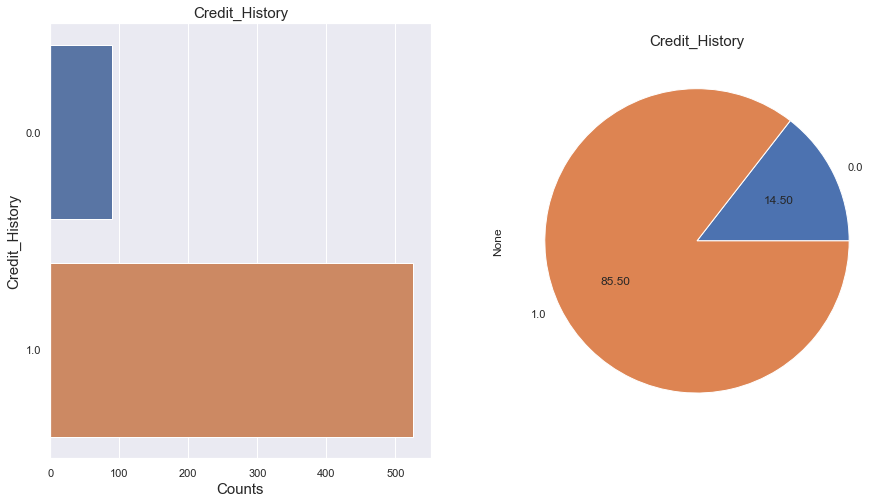

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=data['Credit_History'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Credit_History', fontsize=15 )
plt.title('Credit_History', fontsize=15)

plt.subplot(1,2,2)
data.groupby('Credit_History').size().plot(kind='pie', autopct='%.2f')
plt.title('Credit_History', fontsize=15)
plt.show()

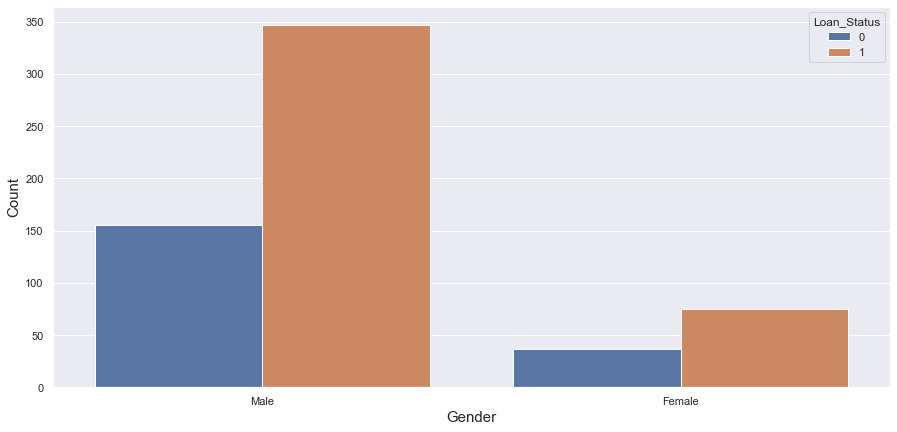

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(data['Gender'], hue='Loan_Status', data= data)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()


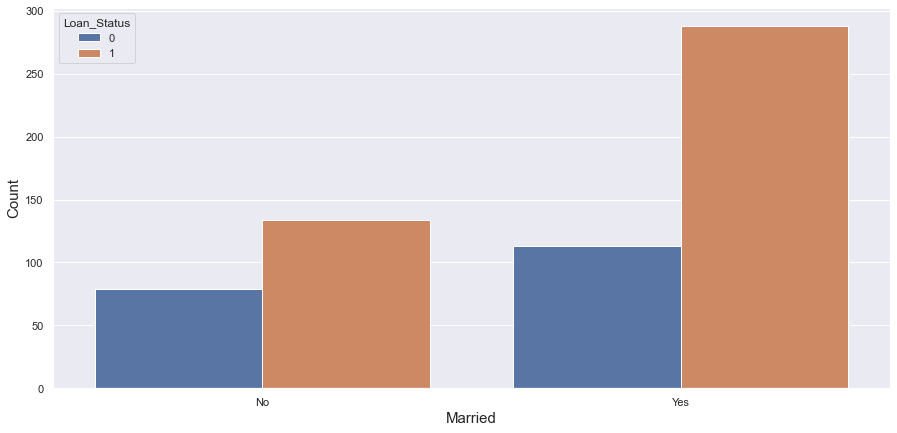

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(data['Married'], hue='Loan_Status', data= data)
plt.xlabel('Married', fontsize= 15)
plt.ylabel('Count', fontsize= 15)

plt.show()


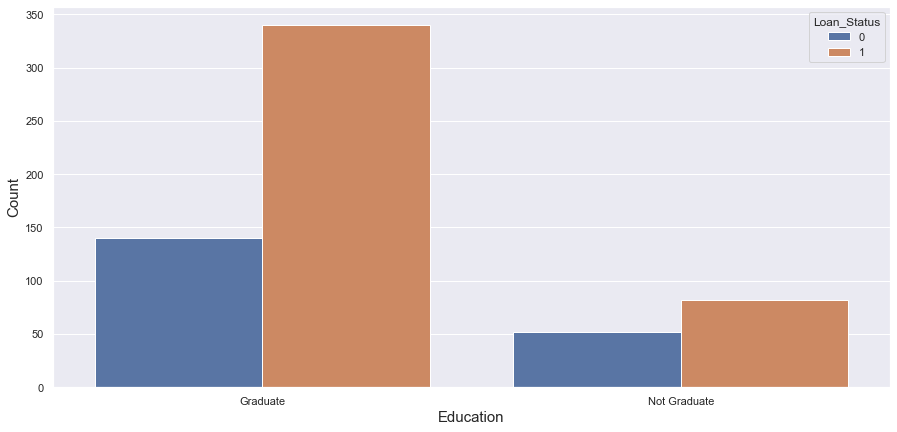

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(data['Education'], hue='Loan_Status', data= data)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

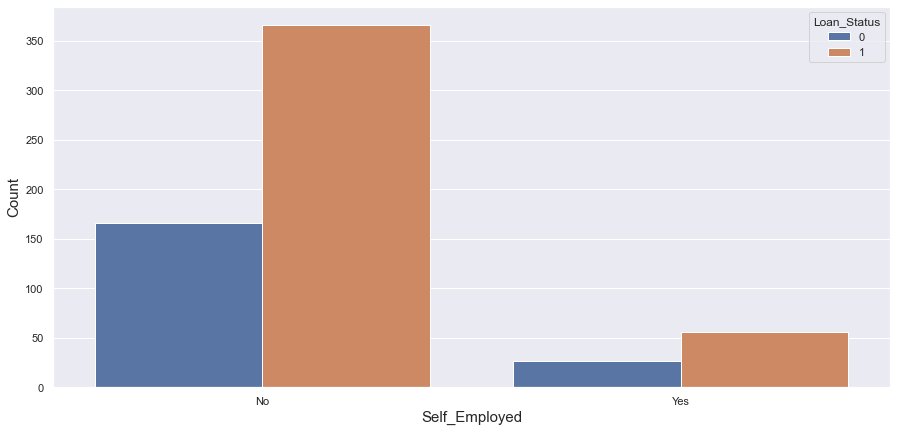

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(data['Self_Employed'], hue='Loan_Status', data= data)
plt.xlabel('Self_Employed', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

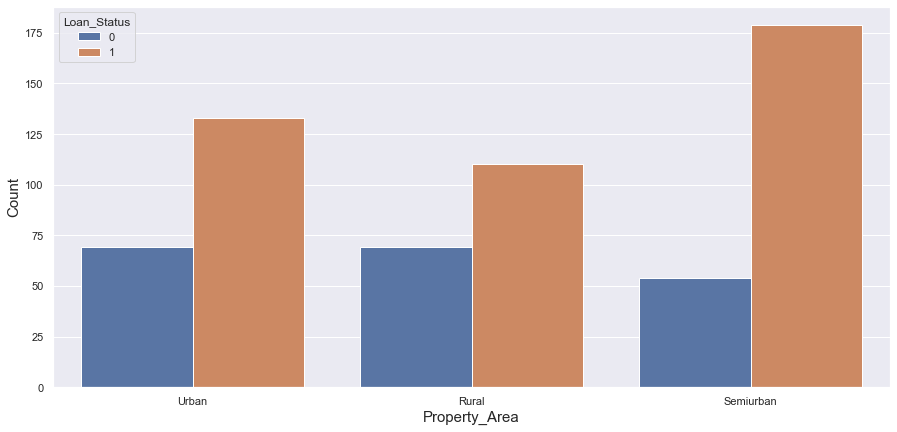

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(data['Property_Area'], hue='Loan_Status', data= data)
plt.xlabel('Property_Area', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

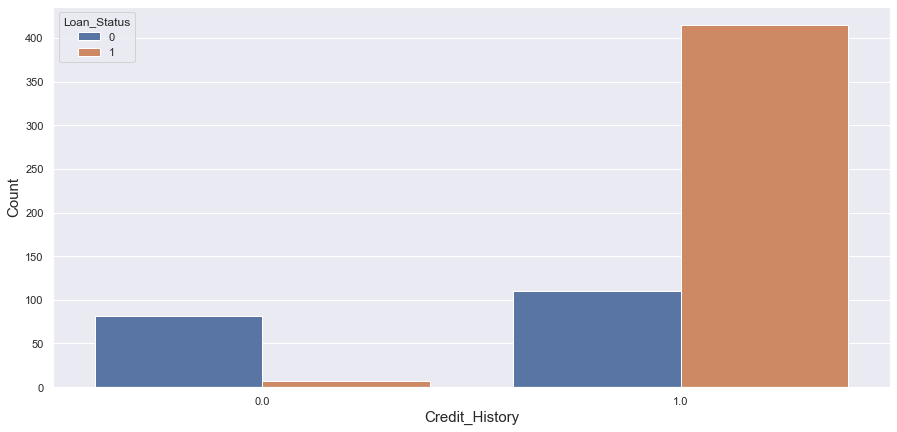

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(data['Credit_History'], hue='Loan_Status', data= data)
plt.xlabel('Credit_History', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

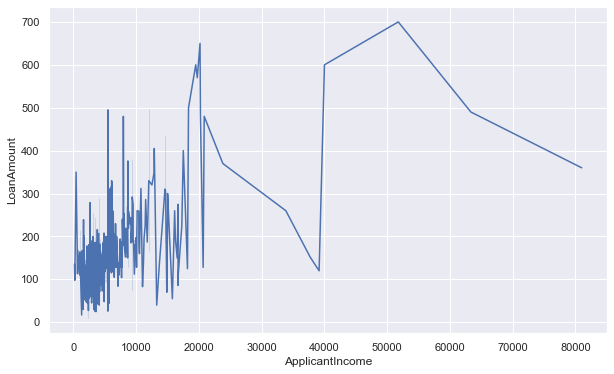

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

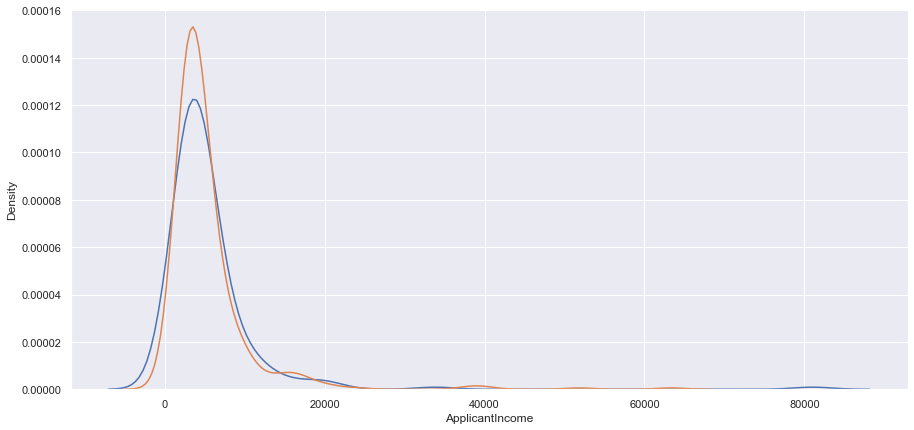

In [45]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['Loan_Status']==0]['ApplicantIncome'], hist=False)
sns.distplot(data[data['Loan_Status']==1]['ApplicantIncome'], hist=False )

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

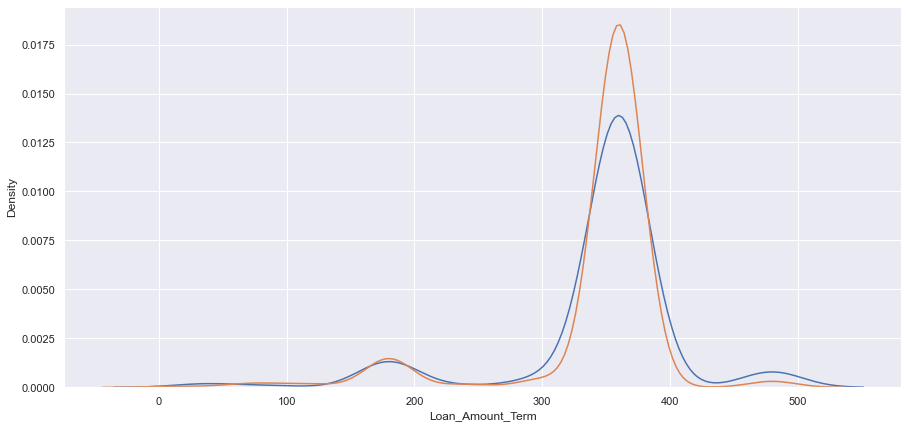

In [46]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['Loan_Status']==0]['Loan_Amount_Term'], hist=False)
sns.distplot(data[data['Loan_Status']==1]['Loan_Amount_Term'], hist=False )

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

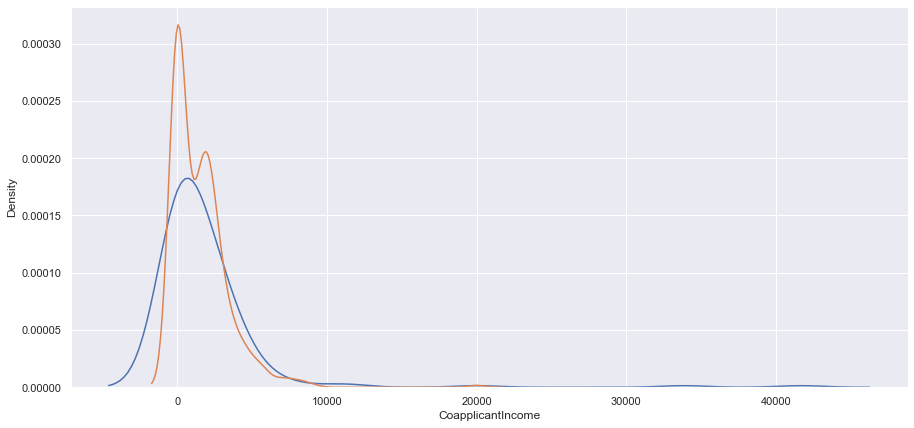

In [47]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['Loan_Status']==0]['CoapplicantIncome'], hist=False)
sns.distplot(data[data['Loan_Status']==1]['CoapplicantIncome'], hist=False )

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

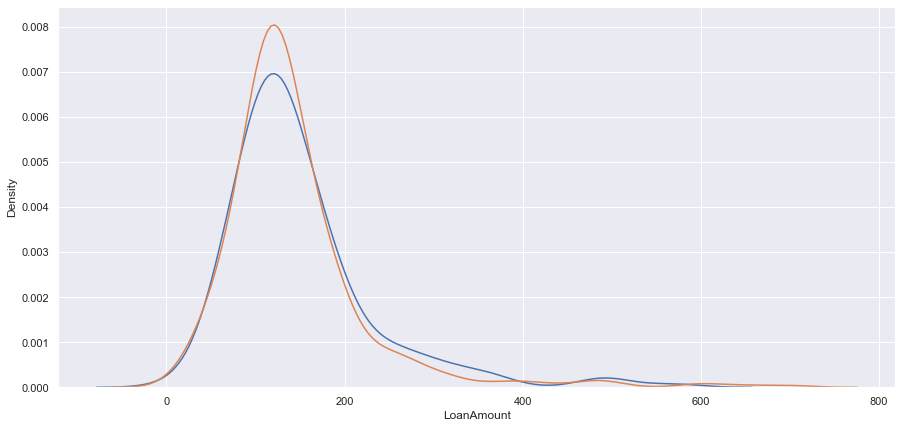

In [48]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['Loan_Status']==0]['LoanAmount'], hist=False)
sns.distplot(data[data['Loan_Status']==1]['LoanAmount'], hist=False )

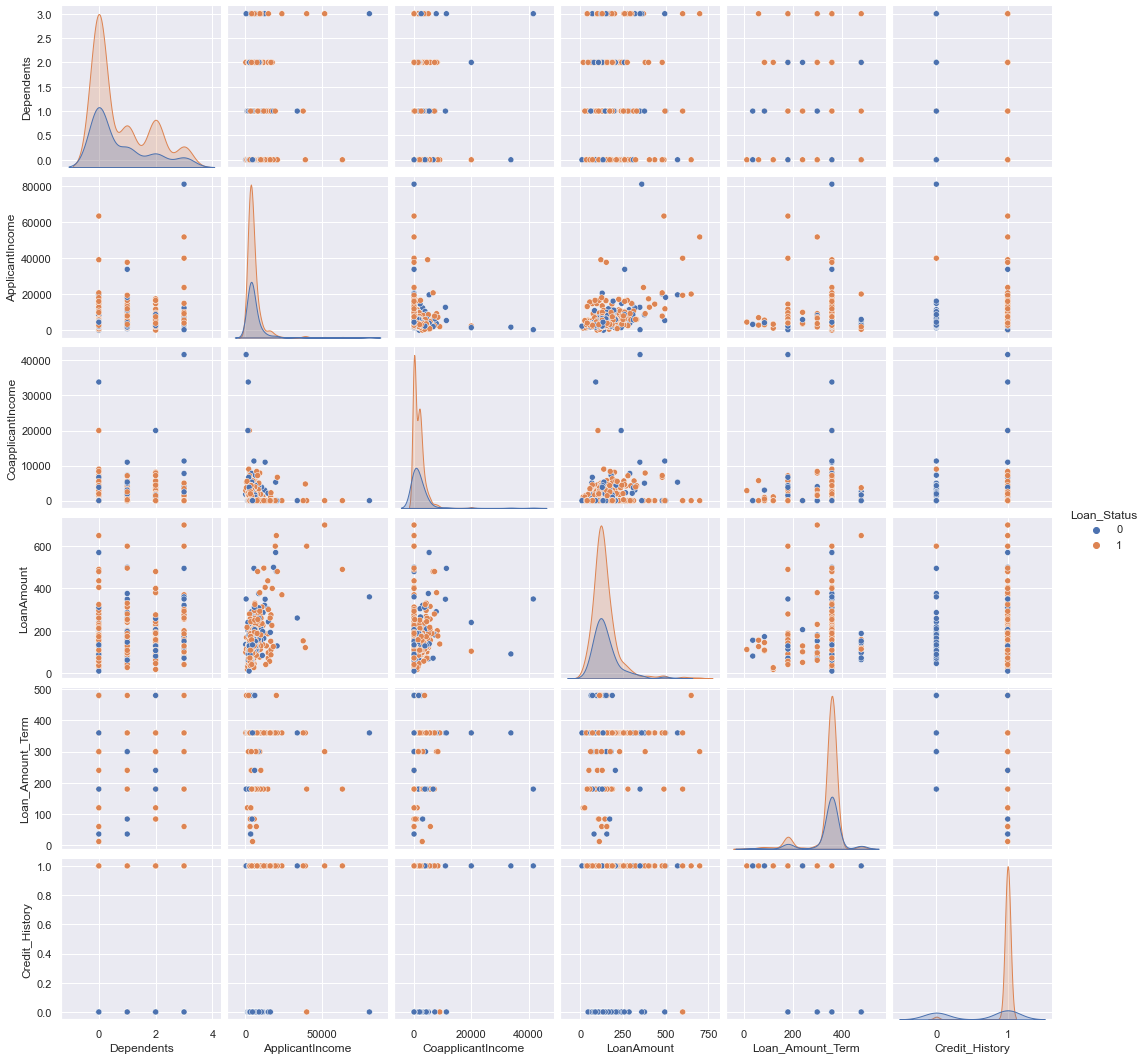

In [49]:
sns.pairplot(data=data, hue='Loan_Status')


In [50]:
feature=data.drop(['Loan_Status'], axis=1)


In [51]:
target= data['Loan_Status']


In [52]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )


In [53]:
data_new['Loan_Status']= target


In [54]:
data_new.shape


(614, 13)

In [55]:
data_new.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [56]:
data_new.corr()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.172914,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.334216,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546,0.091478
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed_Yes,0.056798,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,0.008710,-0.030338,-0.003700


<AxesSubplot:>

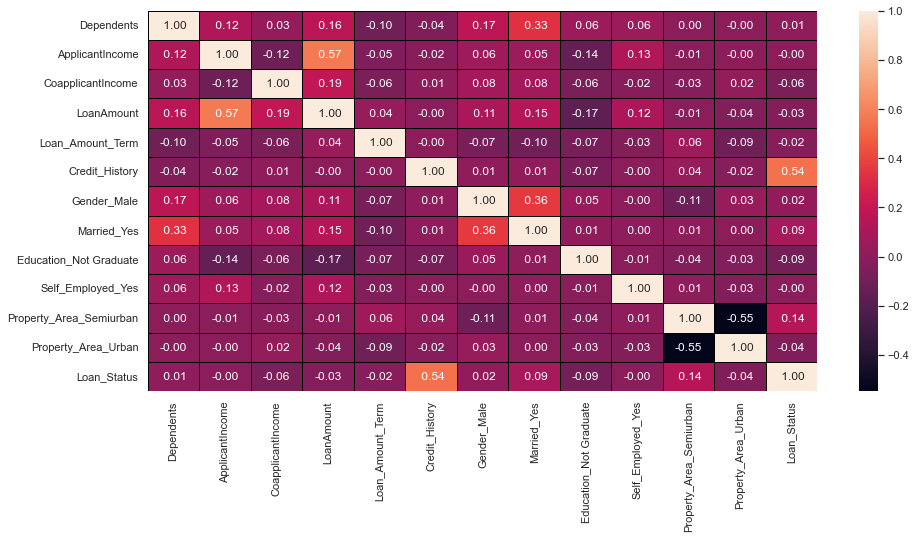

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(data_new.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')


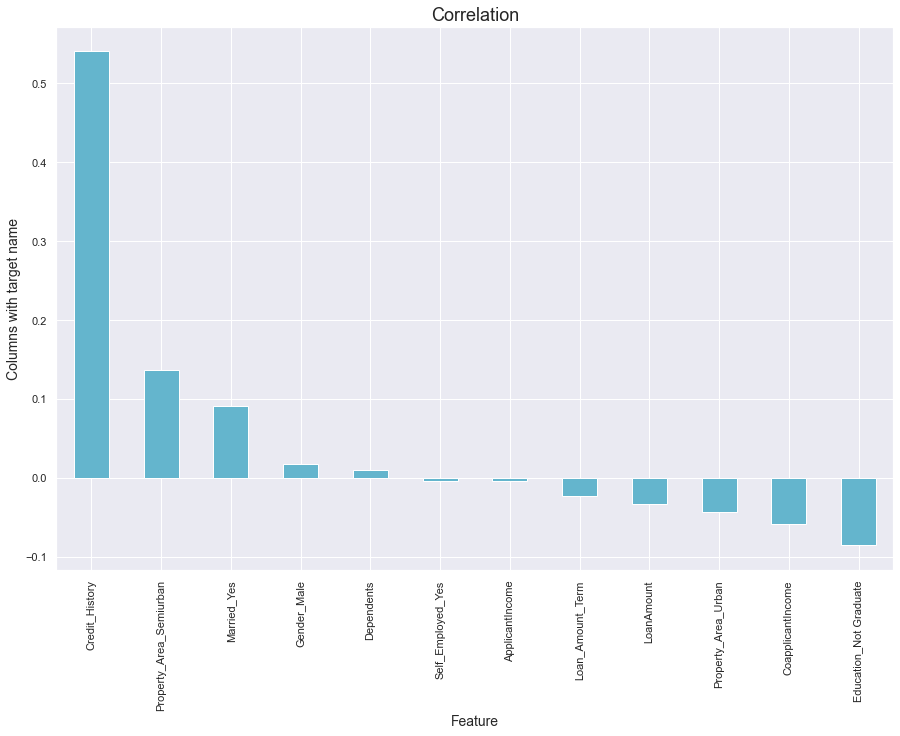

In [58]:
plt.figure(figsize=(15,10))
data_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

<AxesSubplot:>

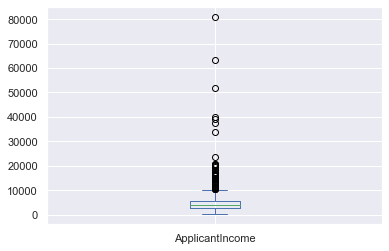

In [59]:
data_new['ApplicantIncome'].plot.box()


<AxesSubplot:>

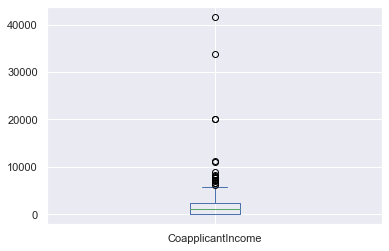

In [60]:
data_new['CoapplicantIncome'].plot.box()


<AxesSubplot:>

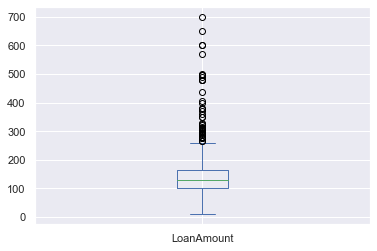

In [61]:
data_new['LoanAmount'].plot.box()


<AxesSubplot:>

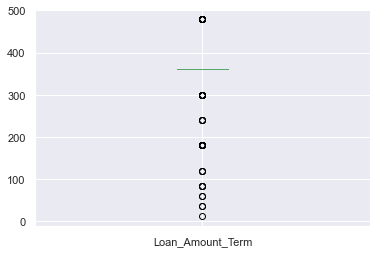

In [62]:
data_new['Loan_Amount_Term'].plot.box()


In [63]:
from scipy.stats import zscore
z= np.abs(zscore(data_new))
z

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.737806,0.072991,0.554487,0.211241,0.273231,0.411733,0.472343,1.372089,0.528362,0.392601,0.782016,1.428147,0.674519
1,0.253470,0.134412,0.038732,0.211241,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,0.782016,0.700208,1.482537
2,0.737806,0.393747,0.554487,0.948996,0.273231,0.411733,0.472343,0.728816,0.528362,2.547117,0.782016,1.428147,0.674519
3,0.737806,0.462062,0.251980,0.306435,0.273231,0.411733,0.472343,0.728816,1.892641,0.392601,0.782016,1.428147,0.674519
4,0.737806,0.097728,0.554487,0.056551,0.273231,0.411733,0.472343,1.372089,0.528362,0.392601,0.782016,1.428147,0.674519
5,1.244745,0.002218,0.880600,1.442758,0.273231,0.411733,0.472343,0.728816,0.528362,2.547117,0.782016,1.428147,0.674519
6,0.737806,0.503019,0.035995,0.603917,0.273231,0.411733,0.472343,0.728816,1.892641,0.392601,0.782016,1.428147,0.674519
7,2.236021,0.387850,0.301914,0.145737,0.273231,2.428760,0.472343,0.728816,0.528362,0.392601,1.278747,0.700208,1.482537
8,1.244745,0.228939,0.032575,0.264730,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,0.782016,1.428147,0.674519
9,0.253470,1.218457,3.196713,2.418499,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,1.278747,0.700208,1.482537


In [64]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([2, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3,
       3, 2, 1, 2, 3, 1, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3],
      dtype=int64))


In [65]:
df=data_new[(z<3).all(axis=1)]
print(data_new.shape)
print(df.shape)

(614, 13)
(577, 13)


In [66]:
Loss_percentage=(614-577)/614*100
print(Loss_percentage)

6.026058631921824


In [67]:
df.skew()


Dependents                 1.052106
ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Gender_Male               -1.622920
Married_Yes               -0.630211
Education_Not Graduate     1.306588
Self_Employed_Yes          2.252848
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
Loan_Status               -0.822635
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform


In [69]:
df_skewed=df.iloc[:,0:6]


In [70]:
X=power_transform(df_skewed, method='yeo-johnson')


In [71]:
X=pd.DataFrame(data=X, columns=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])


In [72]:
df.drop(['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1, inplace=True)


In [73]:
df=df.reset_index()


In [74]:
df['Dependents']=X['Dependents']


In [75]:
df['ApplicantIncome']=X['ApplicantIncome']


In [76]:
df['CoapplicantIncome']=X['CoapplicantIncome']


In [77]:
df['LoanAmount']=X['LoanAmount']


In [78]:
df['Loan_Amount_Term']=X['Loan_Amount_Term']


In [79]:
df['Credit_History']=X['Credit_History']


In [80]:
df

,index,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,1,1,-0.809243,0.681780,-1.122446,0.000771,0.130788,0.418513
1,1,1,1,0,0,0,0,0,0.902869,0.234783,0.744117,0.000771,0.130788,0.418513
2,2,1,1,0,1,0,1,1,-0.809243,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,3,1,1,1,0,0,1,1,-0.809243,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,4,1,0,0,0,0,1,1,-0.809243,0.728848,-1.122446,0.238260,0.130788,0.418513
5,5,1,1,0,1,0,1,1,1.344671,0.540502,1.099231,2.009019,0.130788,0.418513
6,6,1,1,1,0,0,1,1,-0.809243,-0.970781,0.745881,-0.685554,0.130788,0.418513
7,7,1,1,0,0,1,0,0,1.533596,-0.506000,0.916572,0.527553,0.130788,-2.389415
8,8,1,1,0,0,0,1,1,1.344671,-0.009176,0.748075,0.688037,0.130788,0.418513
9,10,1,1,0,0,0,1,1,1.344671,-0.412326,0.495714,-1.321947,0.130788,0.418513


In [81]:
x=df.drop(['index', 'Loan_Status'],axis=1)
y=df['Loan_Status']


In [82]:
from sklearn.preprocessing import StandardScaler


In [83]:
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

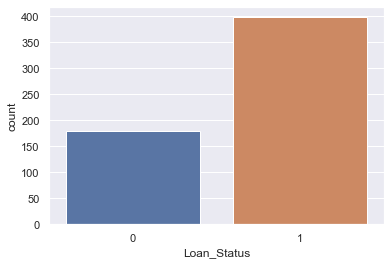

In [84]:
sns.countplot(y)


In [85]:
!pip install imbalanced-learn



In [86]:
conda install -c conda-forge imbalanced-learn



Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [87]:
from imblearn.over_sampling import SMOTE


In [88]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)


In [89]:
X_train_over.shape


(796, 12)

In [90]:
Y_train_over.value_counts()


1    398
0    398
Name: Loan_Status, dtype: int64

In [91]:
dfx=pd.DataFrame(data=X_train_over, columns=['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])


In [92]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [94]:
calc_vif(dfx)


,variables,VIF FACTOR
0,Gender_Male,1.228263
1,Married_Yes,1.524080
2,Education_Not Graduate,1.107537
3,Self_Employed_Yes,1.077011
4,Property_Area_Semiurban,1.396833
5,Property_Area_Urban,1.402683
6,Dependents,1.239491
7,ApplicantIncome,1.825469
8,CoapplicantIncome,1.629318
9,LoanAmount,1.664714


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [96]:
x=dfx
y=Y_train_over

In [97]:
x.shape


(796, 12)

In [98]:
y.shape


(796,)

In [99]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  108 The Model performing Well
At Random State 108
Training Accuracy score is- 72.48427672955975
Testing Accuracy Score is- 72.5
At Random state  161 The Model performing Well
At Random State 161
Training Accuracy score is- 73.11320754716981
Testing Accuracy Score is- 73.125
At Random state  277 The Model performing Well
At Random State 277
Training Accuracy score is- 71.85534591194968
Testing Accuracy Score is- 71.875
At Random state  498 The Model performing Well
At Random State 498
Training Accuracy score is- 73.11320754716981
Testing Accuracy Score is- 73.125
At Random state  506 The Model performing Well
At Random State 506
Training Accuracy score is- 71.22641509433963
Testing Accuracy Score is- 71.25
At Random state  772 The Model performing Well
At Random State 772
Training Accuracy score is- 73.11320754716981
Testing Accuracy Score is- 73.125
At Random state  896 The Model performing Well
At Random State 896
Training Accuracy score is- 71.85534591194968
Testing 

In [100]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=801,test_size=0.20)


In [101]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.7375


In [102]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))


[[60 27]
 [15 58]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        87
           1       0.68      0.79      0.73        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.75      0.74      0.74       160



In [103]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 71.4824120603015
Accuracy Score:- 73.75


at cv:- 3
Cross Validation scre is:- 69.84962406015038
Accuracy Score:- 73.75


at cv:- 4
Cross Validation scre is:- 70.35175879396985
Accuracy Score:- 73.75


at cv:- 5
Cross Validation scre is:- 70.60298742138366
Accuracy Score:- 73.75


at cv:- 6
Cross Validation scre is:- 70.85326953748007
Accuracy Score:- 73.75


at cv:- 7
Cross Validation scre is:- 70.85412646660902
Accuracy Score:- 73.75


at cv:- 8
Cross Validation scre is:- 69.96843434343434
Accuracy Score:- 73.75


at cv:- 9
Cross Validation scre is:- 69.84593122233572
Accuracy Score:- 73.75




In [104]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 73.75
Cross val Score : 73.49679508505778


In [105]:
print(confusion_matrix(y_test_b, svc_pred))

print(classification_report(y_test_b, svc_pred))

[[61 26]
 [16 57]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        87
           1       0.69      0.78      0.73        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



In [106]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 72.5
Cross val Score : 74.62128773260585


In [107]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[66 21]
 [23 50]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        87
           1       0.70      0.68      0.69        73

    accuracy                           0.73       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160



In [108]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 73.75
Cross val score is: 75.12919466808616


In [109]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[65 22]
 [20 53]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.71      0.73      0.72        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



In [110]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  78.75
Cross val Score : 81.7985228558121


In [111]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[65 22]
 [12 61]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        87
           1       0.73      0.84      0.78        73

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



In [112]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  70.625
Cross val Score : 73.75074855279793


In [113]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[61 26]
 [21 52]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        87
           1       0.67      0.71      0.69        73

    accuracy                           0.71       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.71      0.71      0.71       160



In [114]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 69.375
Cross Val Score is : 70.22756005056891


In [115]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[41 46]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.63        87
           1       0.60      0.96      0.74        73

    accuracy                           0.69       160
   macro avg       0.77      0.72      0.68       160
weighted avg       0.78      0.69      0.68       160

